This file contains the four tested models to classify used tools as "reject" or "Rework"

The Models order is as follows:


1.   Random forest Classifier (The chosen model)
2.   Logistic Regression Model
3.   K-Nearest Neighbors Model
4.   Decision Tree Model

All the models' accuracy score have been calculated for comparison purposes and Random Forest Model has been chosen as the best fit for the classification task.
- Evaluation Metrics only for the chosen model have been implemented.
- The model saved and downloaded to be used in the website is the Random Forest Model Only.

In [ ]:
#imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset_Machine_tool_wear.csv')

In [ ]:
#defining a threshold for classification
threshold = 15.0

#create a binary label column ('1' for reject and '0' for rework)
dataset['label'] = (dataset['Vb']> threshold).astype(int)

features = dataset.drop(columns=['label'])
labels = dataset['label']

#normalizing features using min-max scaling
features_normalized = (features - features.min()) / (features.max() - features.min())

#spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, labels, test_size=0.2, stratify=labels
)

#Initializing and training the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

#predictions
y_pred_rf = rf_model.predict(X_test)

#evaluating the model's performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Test Accuracy: 0.9951
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       1.00      1.00      1.00       399

    accuracy                           1.00       411
   macro avg       1.00      0.92      0.95       411
weighted avg       1.00      1.00      0.99       411



Confusion Matrix: 
 [[ 10   2]
 [  0 399]]


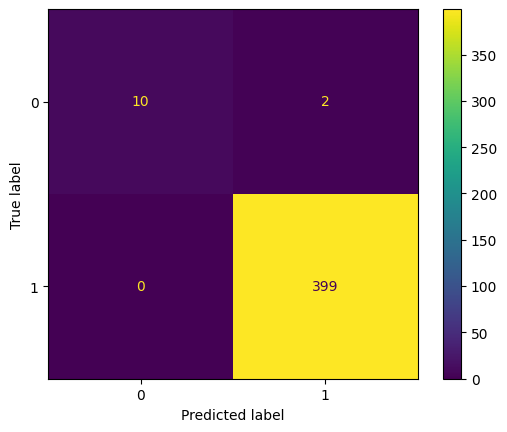

In [ ]:
#Confusion Matrix
confusion_m = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix: \n", confusion_m)
ConfusionMatrixDisplay(confusion_matrix=confusion_m, display_labels=rf_model.classes_).plot()

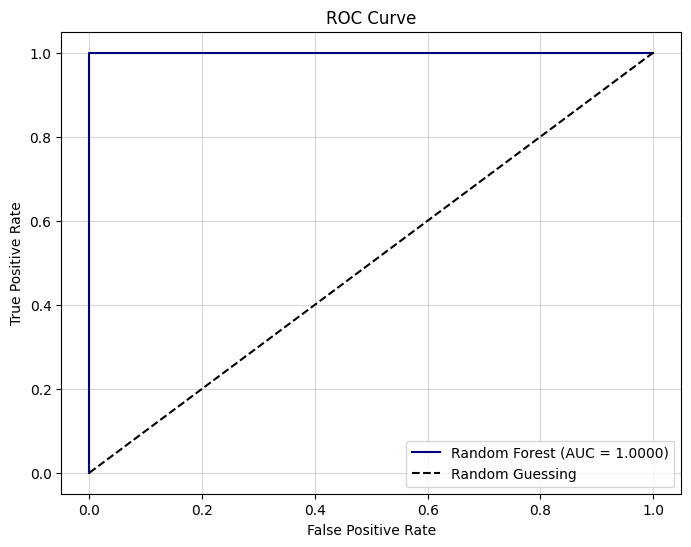

In [ ]:
#Receiver operating characteristic curve (ROC) and Area under the curve (AUC)

# Get the probabilities for the positive class
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', label=f"Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label="Random Guessing")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()


Top 10 Most Important features:
        Feature  Importance
153         Vb    0.226260
43      F_f_SK    0.048097
6        AE_CF    0.032536
0       AE_MAX    0.030962
5    AE_C_0.15    0.026595
89   Vv_s_MEAN    0.024392
47     F_c_RMS    0.022365
1      AE_KURT    0.022165
44    F_f_MEAN    0.021733
79   Vu_s_MEAN    0.021714


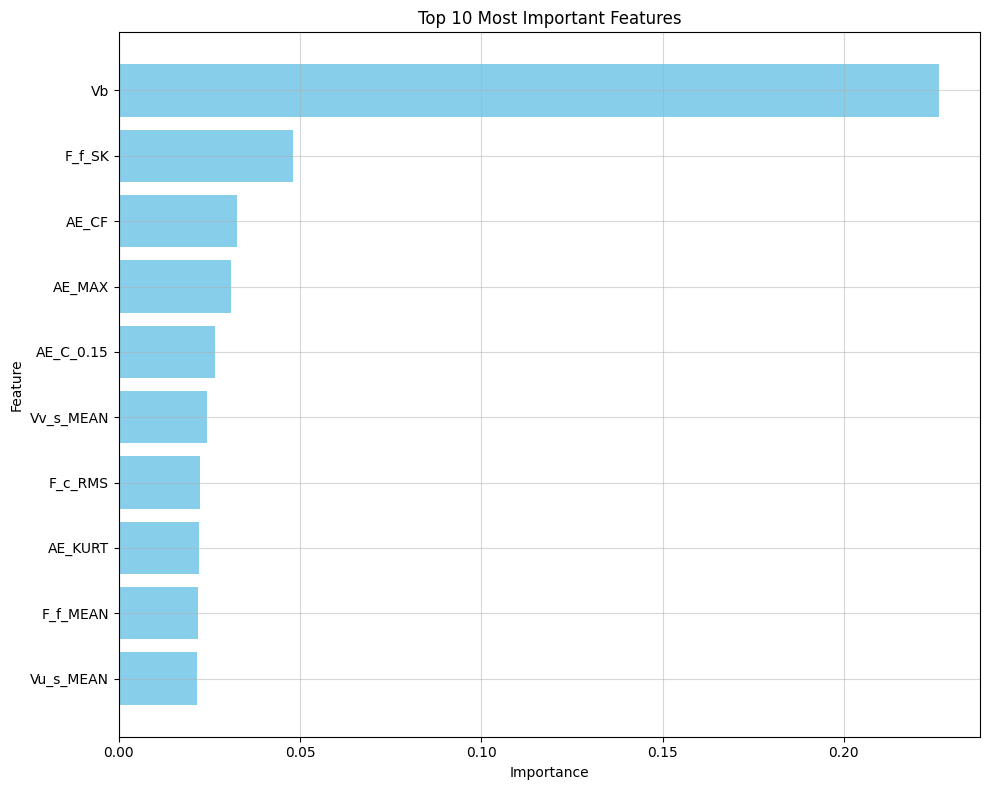

In [ ]:
#feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by = 'Importance', ascending= False)

print("\nTop 10 Most Important features:\n", feature_importances.head(10))

feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(
    feature_importances_sorted['Feature'].head(10),
    feature_importances_sorted['Importance'].head(10),
    color='skyblue'
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#saving the model

from joblib import dump, load

dump(rf_model, 'RandomForestModel2.joblib')


['RandomForestModel.joblib']

In [ ]:
#downloading the model

from google.colab import files
files.download('RandomForestModel2.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Using Logistic Regression Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

threshold = 15.0
dataset['label'] = (dataset['Vb'] > threshold).astype(int)

features = dataset.drop(columns=['label'])
labels = dataset['label']

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Normalize features
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features_imputed)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, labels, test_size=0.2, stratify=labels, random_state=42
)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Test Accuracy: {log_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Test Accuracy: 0.9732
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.98      1.00      0.99       399

    accuracy                           0.97       411
   macro avg       0.82      0.58      0.63       411
weighted avg       0.97      0.97      0.97       411



In [ ]:
#Using K-nearest neighbors (KNN) Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/Dataset_Machine_tool_wear.csv')

# Define a threshold for classification
threshold = 15.0

dataset['label'] = (dataset['Vb'] > threshold).astype(int)

features = dataset.drop(columns=['label', 'tool'])
labels = dataset['label']

if dataset.isnull().sum().sum() > 0:
    features.fillna(features.mean(), inplace=True)

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, labels, test_size=0.2, stratify=labels, random_state=42
)

# Initialize and train the k-NN classifier
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model's performance
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Test Accuracy (k={k}): {knn_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


k-NN Test Accuracy (k=5): 0.9781
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.98      1.00      0.99       399

    accuracy                           0.98       411
   macro avg       0.99      0.62      0.69       411
weighted avg       0.98      0.98      0.97       411



In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Training
dt_model = DecisionTreeClassifier(max_depth=5, max_features = 18)
dt_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.9927
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.99      1.00       399

    accuracy                           0.99       411
   macro avg       0.90      1.00      0.94       411
weighted avg       0.99      0.99      0.99       411



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
